In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [13]:
palette = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Offered load by STA [Mbps]"

In [14]:
data = pd.read_csv('load3.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,dataRate,scenario,switchAuxPhy
0,1,1,1,0.5,1,0.004857,0.000024,0.002091,99.999,1572790264,...,1029363,1.00443,1.00443,121,121,24.9784,2152.170,100,1,0
1,1,1,1,0.5,1,0.003400,0.000092,0.000378,100.000,1572813184,...,1029363,1.00438,1.00438,121,121,94.2053,389.568,100,2,0
2,1,1,1,0.5,1,0.003497,0.000105,0.000251,100.001,1572811656,...,1029363,1.00435,1.00435,121,121,108.0560,258.800,100,3,0
3,1,1,1,0.5,1,0.003303,0.000109,0.000206,100.001,1572814712,...,1029363,1.00434,1.00434,121,121,111.8020,211.705,100,4,0
4,1,1,1,0.5,1,46.634300,0.000097,0.899032,106.735,1678728032,...,2058708,1.00443,1.00443,121,121,106.5800,987716.000,200,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,1,1,0.5,1,56.969400,0.000020,0.183800,645.467,10151941848,...,15440042,1.00434,1.00434,121,121,132.1790,1221160.000,1500,4,0
71,1,1,1,0.5,1,29.440500,0.000011,0.122033,987.863,15537162400,...,14410953,1.00433,1.00433,121,121,111.0460,1240860.000,1400,5,0
72,1,1,1,0.5,1,86.501600,0.000096,0.531753,202.479,3184604120,...,15440042,1.00438,1.00438,121,121,199.3430,1108260.000,1500,2,0
73,1,1,1,0.5,1,74.587500,0.000044,0.301316,381.192,5995419712,...,15440042,1.00435,1.00435,121,121,172.0800,1182270.000,1500,3,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_21340\4054493447.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 7 len(labels) = 5
  ax.legend(


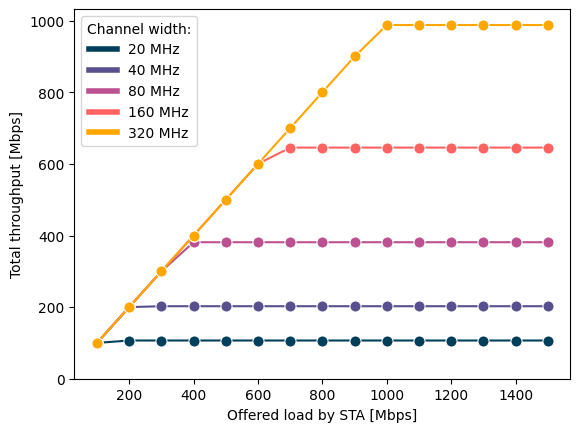

In [15]:
plot_sum = data.groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_linewidth(4) 
ax.legend(
      handles=handles[1:8],
      labels=['20 MHz', '40 MHz', '80 MHz', '160 MHz', '320 MHz'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='medium',   # Rozmiar czcionki
      title='Channel width:',         # <- Tytuł legendy
      title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dataRate_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_103928\4227836086.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_103928\4227836086.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(
C:\Users\Admin\AppData\Local\Temp\ipykernel_103928\4227836086.py:28: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  axes[i].legend(


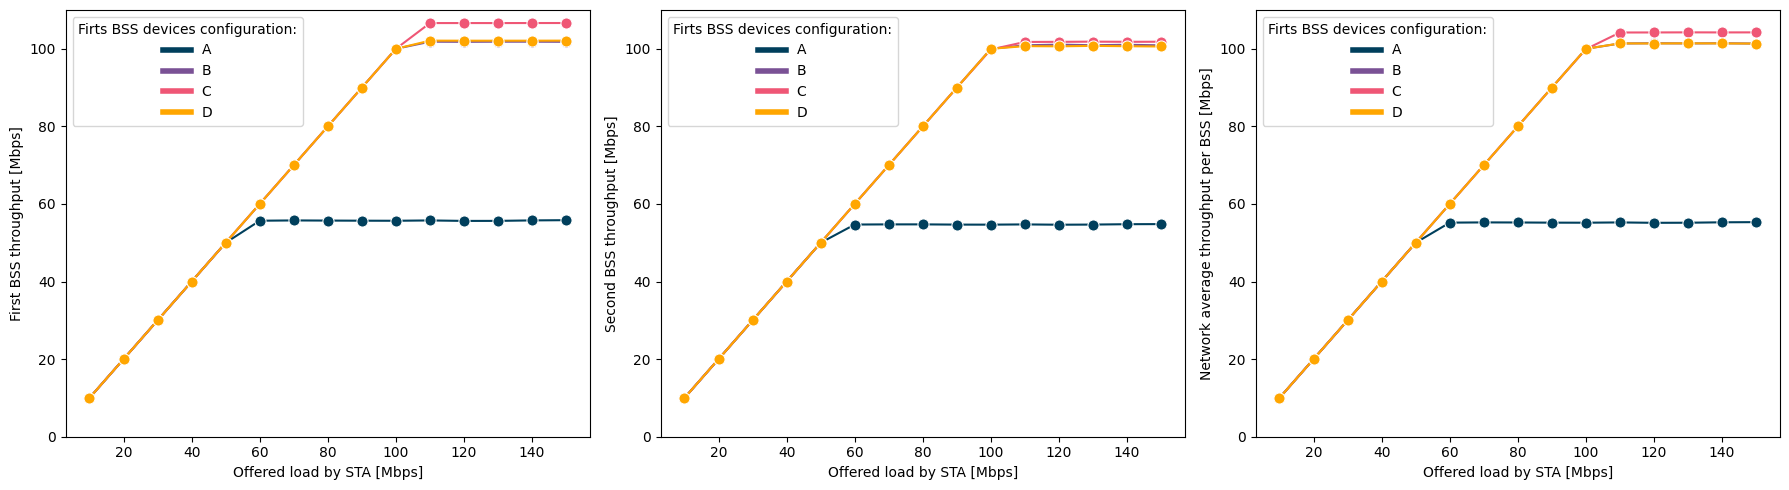

In [12]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Offered load by STA [Mbps]"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'First BSS throughput [Mbps]'),
    (df1, 'Second BSS throughput [Mbps]'),
    (df_sum, 'Network average throughput per BSS [Mbps]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.lineplot(data=df, x='dataRate', y='throughput', hue='scenario',
                 errorbar=('ci'), markers=True, palette=palette,
                 style='flow' if 'flow' in df.columns else None,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    for handle in handles:
        handle.set_linewidth(4) 
    axes[i].legend(
        handles=handles[1:8],
        labels=['A', 'B', 'C', 'D'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='Firts BSS devices configuration:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 110)
    else:
        axes[i].set_ylim(0, 110) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dataRate_thr_flows.svg', bbox_inches='tight')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\3184690722.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


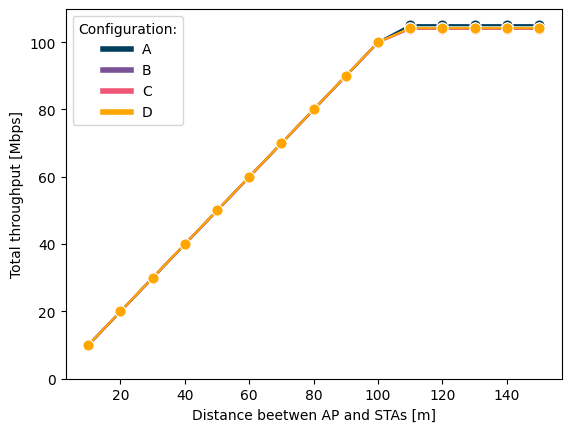

In [10]:
plot_sum = data.groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_linewidth(4) 
ax.legend(
      handles=handles[1:8],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='medium',   # Rozmiar czcionki
      title='Configuration:',         # <- Tytuł legendy
      title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dataRate_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\4042652748.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


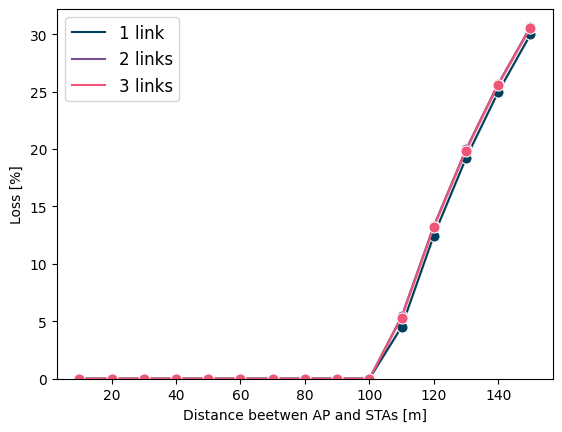

In [5]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Loss [%]')
plt.savefig('dataRate_loss.svg', bbox_inches='tight')

In [6]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1665373043.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


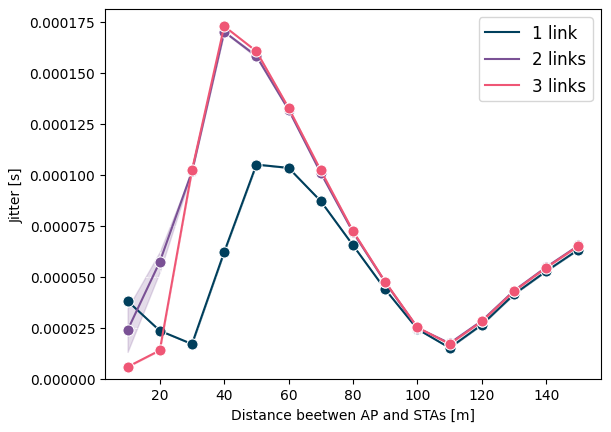

In [7]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
plt.savefig('dataRate_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\264487034.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='dataRate', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')


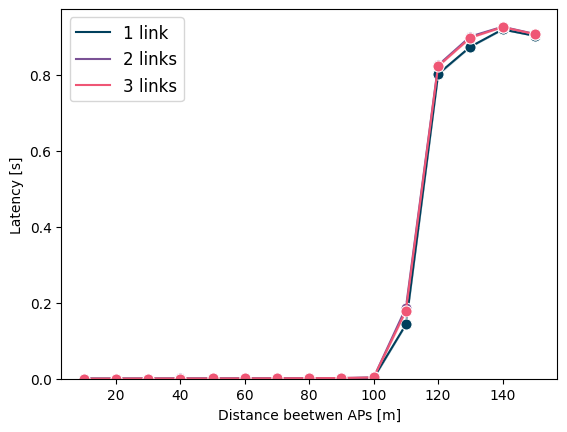

In [8]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='dataRate', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel='Distance beetwen APs [m]', ylabel='Latency [s]')
plt.savefig('dataRate_lat.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1433276297.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_3816\1433276297.py:19: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber',


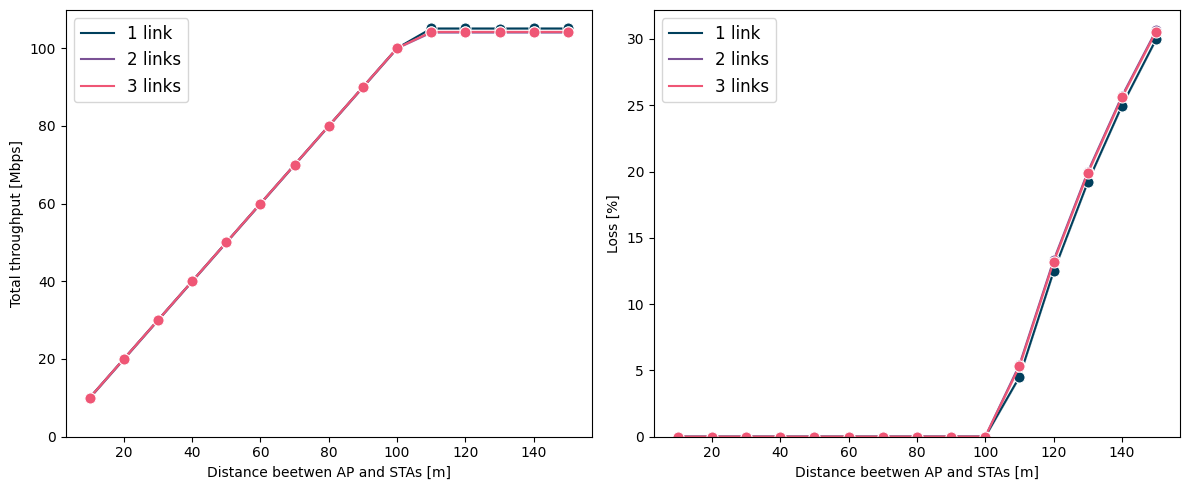

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='dataRate', y='throughput', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='nStations')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='dataRate', y='loss', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='nStations')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dataRate_thr_loss.svg', bbox_inches='tight')
plt.show()
